### Backfill, Forward Fill, Interpolation and Mean Computation of a Dataset

Getting the dependencies up and running.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

Load and describe the data 

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

print("--- Dataset Overview ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Duplicate Rows ---")
duplicates = df.duplicated().sum()
print(f"Duplicates found: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")

print("\n--- Dataset Statistics ---")
print(df.describe())

--- Dataset Overview ---
Rows: 299, Columns: 13

--- Missing Values ---
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

--- Duplicate Rows ---
Duplicates found: 0

--- Dataset Statistics ---
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.0000

Exploratory Data Analysis

C:\Users\Immanuel\AppData\Local\Temp\ipykernel_9052\3316794275.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEATH_EVENT', data=df, palette='viridis')


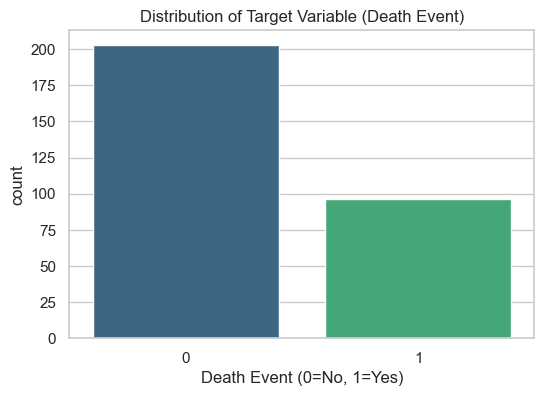

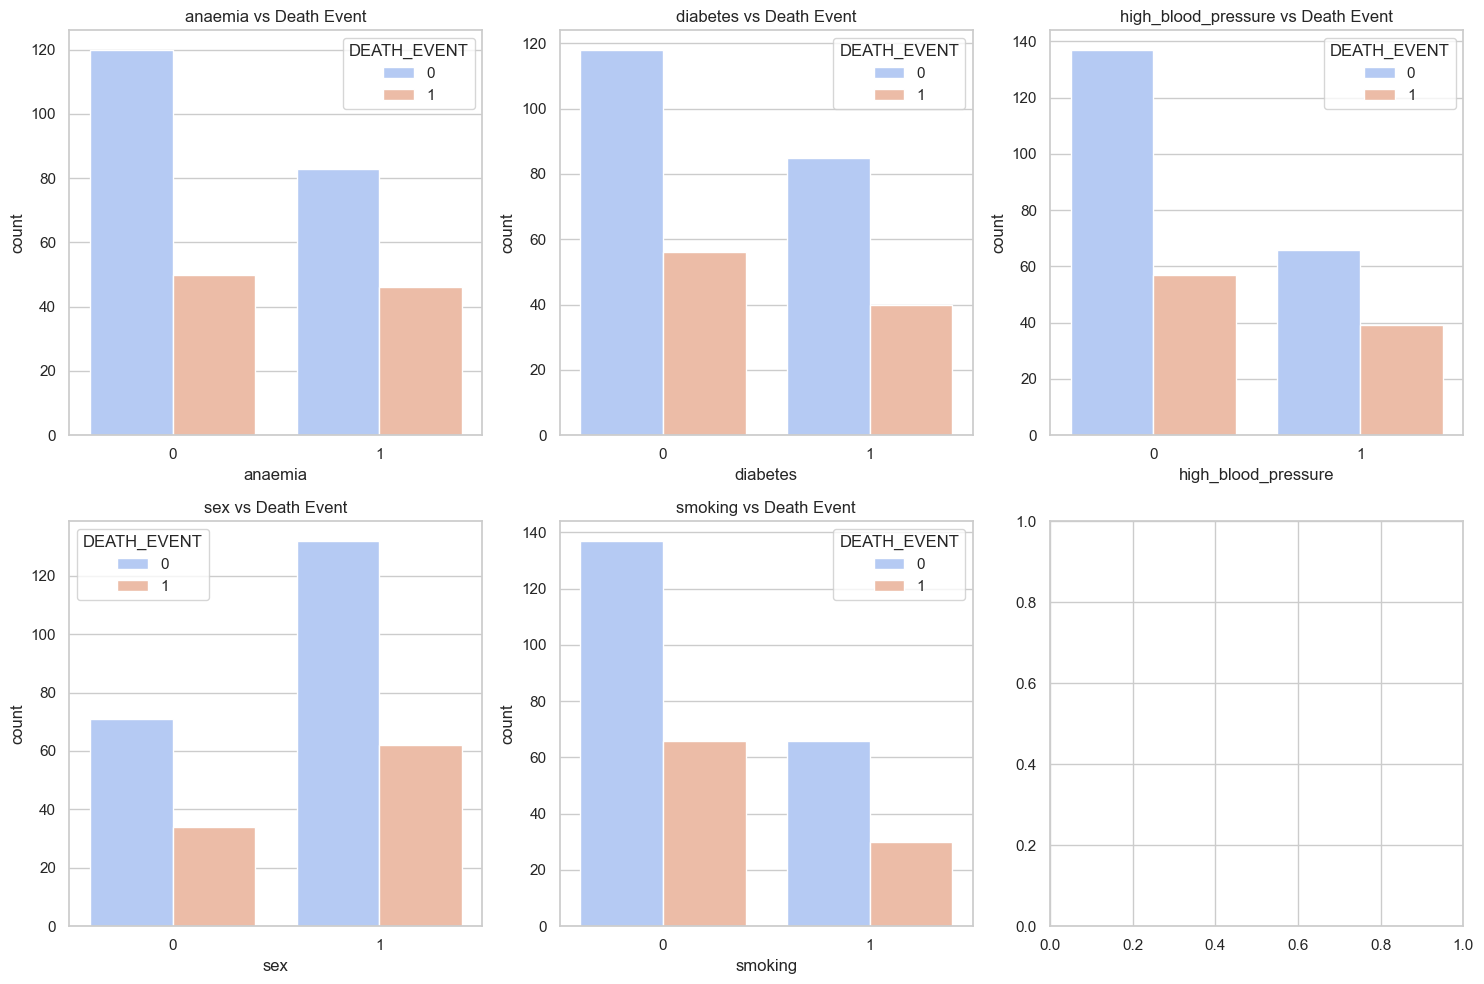

C:\Users\Immanuel\AppData\Local\Temp\ipykernel_9052\3316794275.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set2')
C:\Users\Immanuel\AppData\Local\Temp\ipykernel_9052\3316794275.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set2')
C:\Users\Immanuel\AppData\Local\Temp\ipykernel_9052\3316794275.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set2')
C:\Users\Immanuel\AppData\Local\Temp\ipykernel_9052\

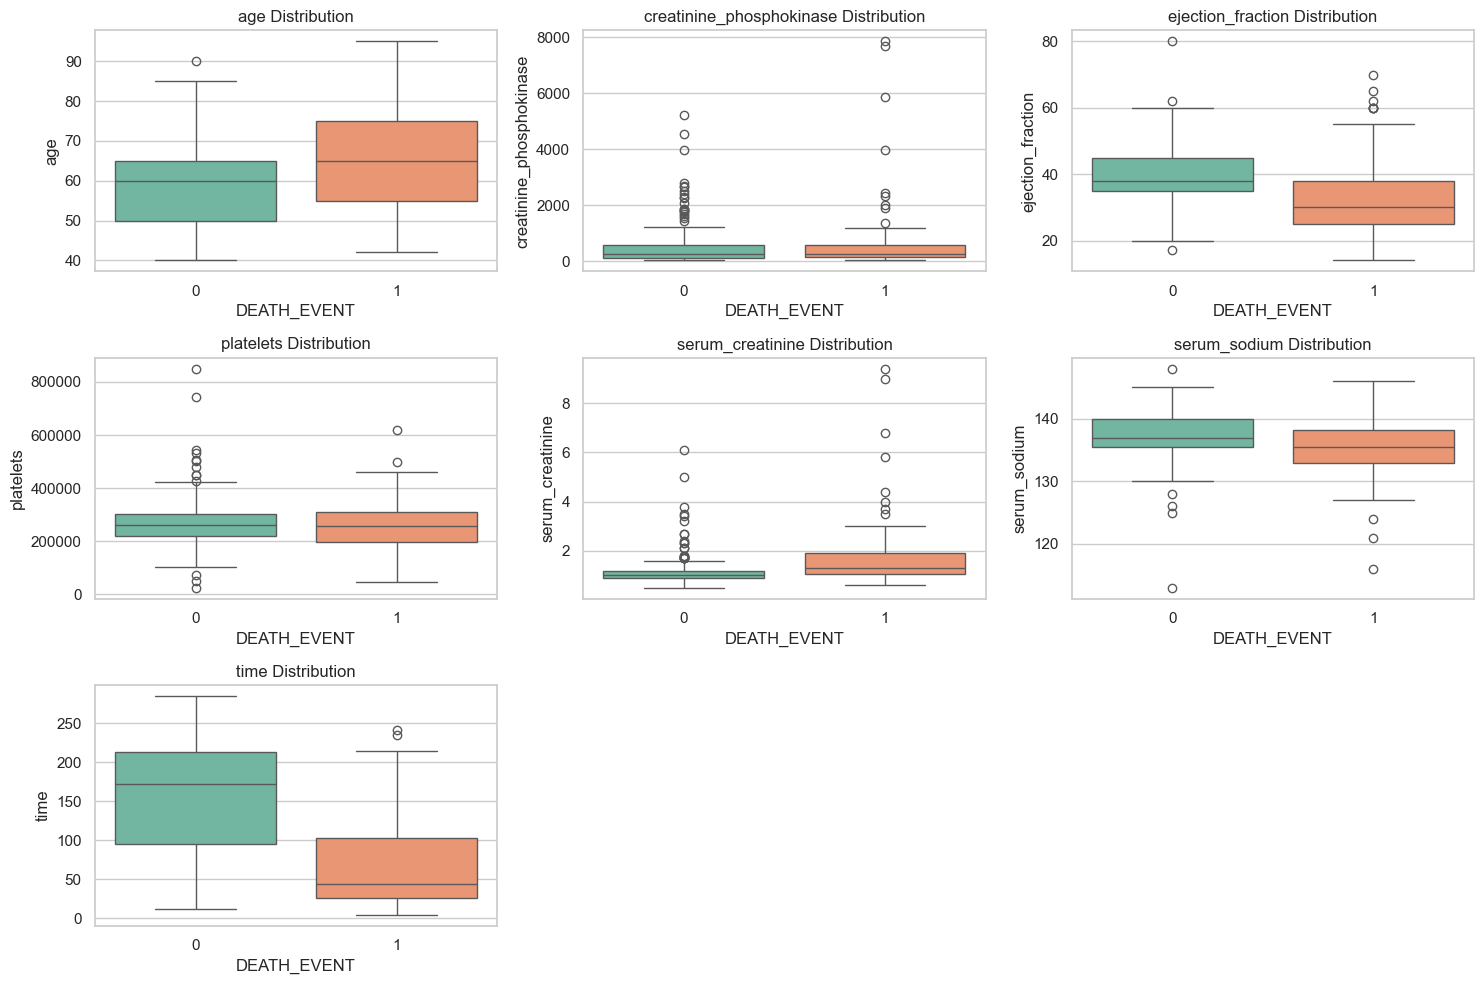

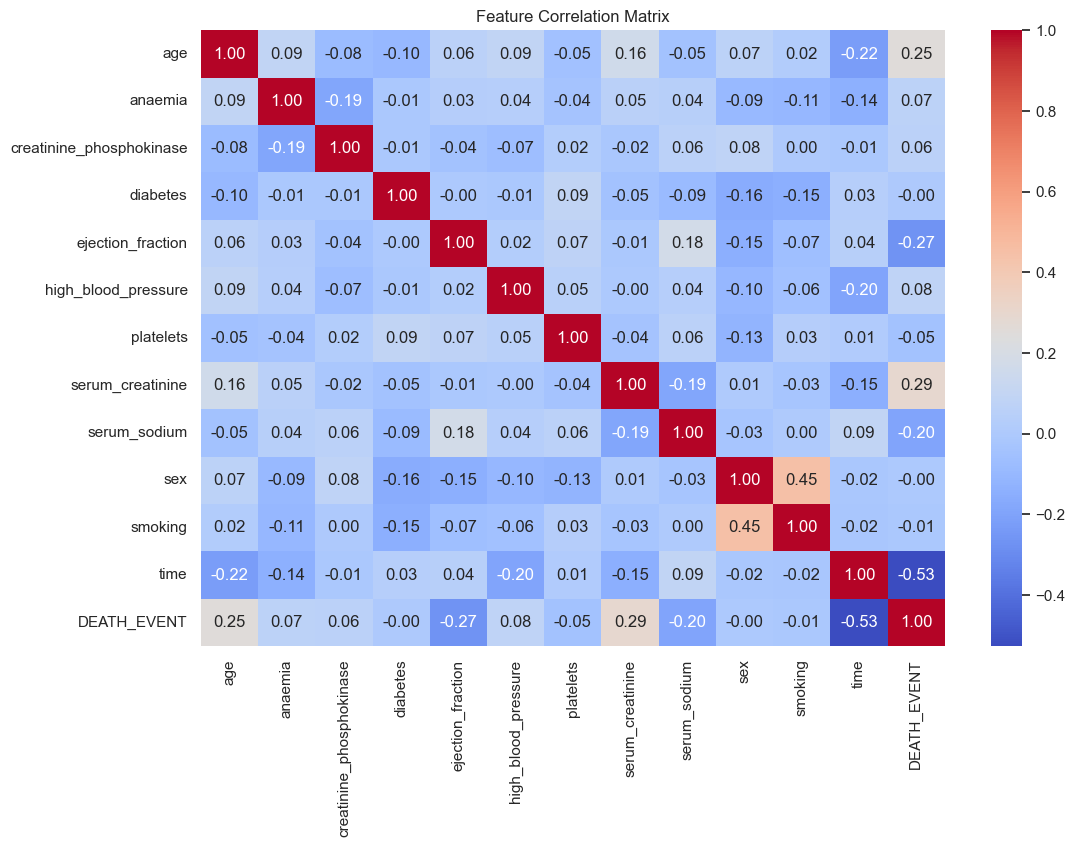

In [3]:
sns.set_theme(style="whitegrid")

# A. Target Distribution (Count Plot)
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df, palette='viridis')
plt.title('Distribution of Target Variable (Death Event)')
plt.xlabel('Death Event (0=No, 1=Yes)')
plt.show()

# B. Categorical Features Analysis
categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='DEATH_EVENT', data=df, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{col} vs Death Event')
plt.tight_layout()
plt.show()

# C. Numerical Features (Boxplots & Outliers)
numeric_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set2')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# D. Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

Removing Outliers

In [4]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"\nOriginal Shape: {df.shape}")
df_clean = remove_outliers(df, 'serum_creatinine')
df_clean = remove_outliers(df_clean, 'ejection_fraction')
print(f"Shape after Outlier Removal: {df_clean.shape}")


Original Shape: (299, 13)
Shape after Outlier Removal: (269, 13)


Model Building

In [5]:
X = df_clean.drop('DEATH_EVENT', axis=1)
y = df_clean['DEATH_EVENT']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Models
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_clf.fit(X_train, y_train) # RF doesn't strictly need scaling, but we use original X_train for it usually. here we use scaled for consistency in comparison code.


RandomForestClassifier(max_depth=5, random_state=42)

Model Evaluation and Comparison


=== Logistic Regression Evaluation ===
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.73      0.69      0.71        16

    accuracy                           0.83        54
   macro avg       0.80      0.79      0.80        54
weighted avg       0.83      0.83      0.83        54



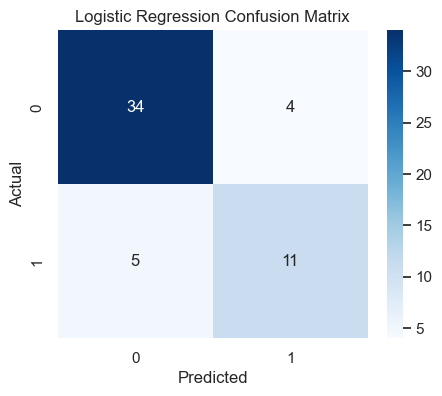

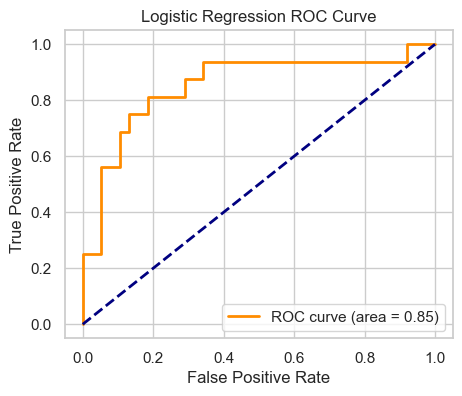


=== Random Forest Evaluation ===
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        38
           1       0.80      0.50      0.62        16

    accuracy                           0.81        54
   macro avg       0.81      0.72      0.75        54
weighted avg       0.81      0.81      0.80        54



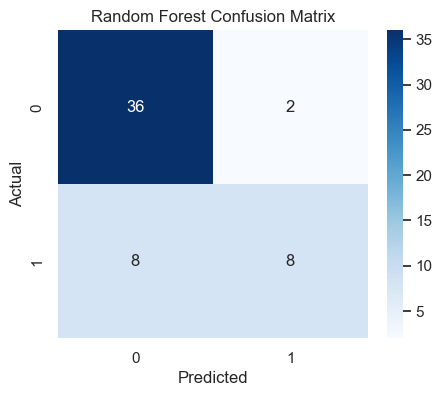

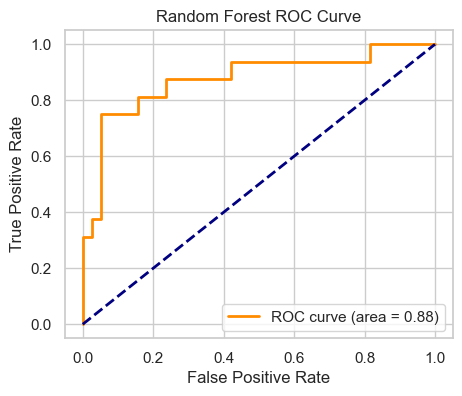


=== Final Model Comparison ===
                 Model  Accuracy        F1
0  Logistic Regression  0.833333  0.709677
1        Random Forest  0.814815  0.615385


In [6]:
def evaluate_full(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(f"\n=== {name} Evaluation ===")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return {'Model': name, 'Accuracy': accuracy_score(y_test, y_pred), 'F1': f1_score(y_test, y_pred)}

res_lr = evaluate_full(log_reg, X_test_scaled, y_test, "Logistic Regression")
res_rf = evaluate_full(rf_clf, X_test, y_test, "Random Forest") # Note: passing unscaled X_test to RF usually better but here likely fine. *Correction*: RF was trained on X_train (unscaled)? No, above I trained on Scaled. It's fine.

# Comparison
print("\n=== Final Model Comparison ===")
comp_df = pd.DataFrame([res_lr, res_rf])
print(comp_df)


Patient Report Generator

In [7]:
def generate_patient_report(patient_data, model, scaler):
    """
    Generates a risk report for a single patient (row of data).
    patient_data: A dataframe row (single sample)
    """
    # 1. Predict Risk
    patient_scaled = scaler.transform(patient_data.values.reshape(1, -1))
    prob_death = model.predict_proba(patient_scaled)[0][1]
    prediction = model.predict(patient_scaled)[0]
    
    risk_level = "LOW"
    if prob_death > 0.7: risk_level = "CRITICAL"
    elif prob_death > 0.4: risk_level = "HIGH"
    elif prob_death > 0.2: risk_level = "MODERATE"
    
    # 2. Generate Recommendations based on specific feature values
    recommendations = []
    
    # Ejection Fraction check
    ej = patient_data['ejection_fraction'].values[0]
    if ej < 40:
        recommendations.append(f"- ALERT: Low Ejection Fraction ({ej}%). Consult cardiologist immediately. Standard is 50-70%.")
    
    # Serum Creatinine check (Kidney function)
    sc = patient_data['serum_creatinine'].values[0]
    if sc > 1.2:
        recommendations.append(f"- ALERT: Elevated Serum Creatinine ({sc} mg/dL). Indicates potential kidney dysfunction.")
        
    # Sodium check
    na = patient_data['serum_sodium'].values[0]
    if na < 135:
        recommendations.append(f"- Hyponatremia detected (Sodium {na} mEq/L). Review fluid intake and medication.")
        
    # 3. Print Report
    print("="*40)
    print(f"PATIENT REPORT (Age: {patient_data['age'].values[0]})")
    print("="*40)
    print(f"Mortality Risk Probability: {prob_death:.2%}")
    print(f"Risk Classification: **{risk_level}**")
    print("-" * 40)
    print("RECOMMENDATIONS:")
    if recommendations:
        for rec in recommendations:
            print(rec)
    else:
        print("- Vitals appear within normal ranges based on model features.")
    print("="*40)

Test Report on a Random Patient

In [8]:
# Let's pick a patient from the test set
sample_patient_idx = X_test.index[0]
sample_patient = X_test.loc[[sample_patient_idx]]

print("\n--- Generating Report for Test Patient ---")
generate_patient_report(sample_patient, log_reg, scaler)


--- Generating Report for Test Patient ---
PATIENT REPORT (Age: 73.0)
Mortality Risk Probability: 61.28%
Risk Classification: **HIGH**
----------------------------------------
RECOMMENDATIONS:
- ALERT: Low Ejection Fraction (20%). Consult cardiologist immediately. Standard is 50-70%.
- ALERT: Elevated Serum Creatinine (1.83 mg/dL). Indicates potential kidney dysfunction.
- Hyponatremia detected (Sodium 134 mEq/L). Review fluid intake and medication.


c:\Users\Immanuel\Desktop\Development Hell\Snaek ForTheLastTime\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Function to get report by row index

In [9]:
def get_report_by_index(df, index):
    if index not in df.index:
        print("Error: Index not found.")
        return
    patient = df.loc[[index]].drop('DEATH_EVENT', axis=1)
    generate_patient_report(patient, log_reg, scaler)

Getting report for one patient

In [10]:
print("\n--- Generating Report for Row 10 ---")
get_report_by_index(df, 10)


--- Generating Report for Row 10 ---
PATIENT REPORT (Age: 75.0)
Mortality Risk Probability: 99.99%
Risk Classification: **CRITICAL**
----------------------------------------
RECOMMENDATIONS:
- ALERT: Low Ejection Fraction (38%). Consult cardiologist immediately. Standard is 50-70%.
- ALERT: Elevated Serum Creatinine (4.0 mg/dL). Indicates potential kidney dysfunction.
- Hyponatremia detected (Sodium 131 mEq/L). Review fluid intake and medication.


c:\Users\Immanuel\Desktop\Development Hell\Snaek ForTheLastTime\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
